## Model Information

This model uses Fashion MNIST dataset consists of 70,000 28 x 28 grayscale images and 10 fashion categories, is configured to capture only coat and bag images. The following configuration have been implemented in this model.

- Filters (vertical and horizonal lines) to learn to detect badisc structures, then combine it in the complex patterns.
- Strides to shift by 1 unit (or pixel) at a time along both the height and the width of the image.
- Padding (SAME) to use zero padding if necessary.
- Max pooling layers to to reduce the spatial dimensions (height and width) of the input image.
- Dropout to prevent overfitting and imrpove generalization.
- Early Stopping to stop once the model creases to improve.
- Convolutional layers to process and learn features from spatial data effectively and efficiently.

## Import Necessary Functions

In [105]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensoflow
import tensorflow as tf
from tensorflow import keras

# Pandas
import pandas as pd

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


## Load and Explore Data

In [106]:
# load fashion MNIST data, then split into Training and Test sets
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [107]:
X_train_full.shape # Get the dimesion of the Training set

(60000, 28, 28)

In [108]:
X_train_full.dtype # Get the data tyoe of the Training set

dtype('uint8')

In [109]:
# Splitting dataset and normalization
# Taking the first 5000 samples from the training set, normalizing pixel values to the range [0,1] and assigning them to the validation dataset.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 

# Taking the corresponding labels for the first 5000 samples for the validation datasetand the rest for the training dataset.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalizing the pixel values of the test dataset to the range [0,1] by dividing each pixel value by 255.
X_test = X_test / 255.

In [110]:
# Assign category of images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_images


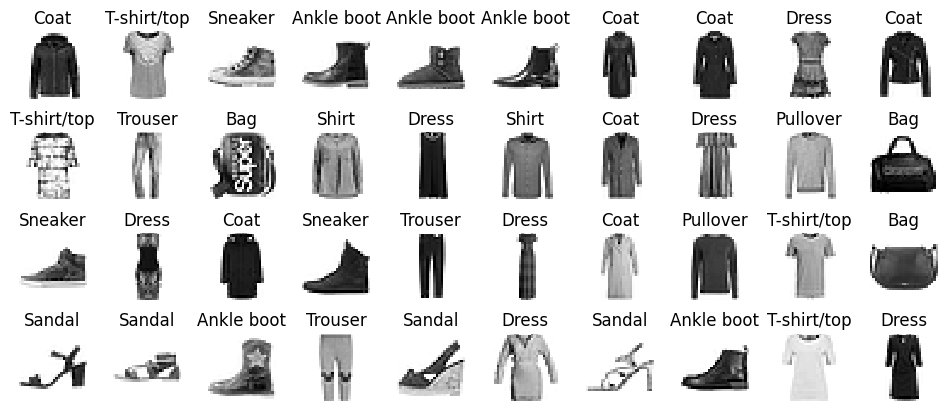

In [111]:
# Display images from fashion MNIST on training set
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images', tight_layout=False)
plt.show()

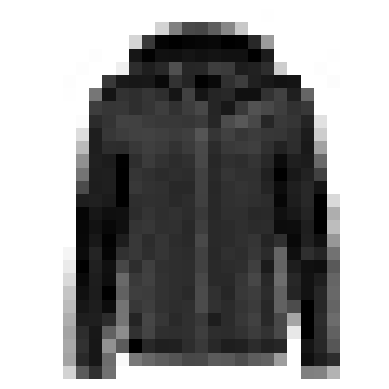

In [112]:
# Display first image (index 0)
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

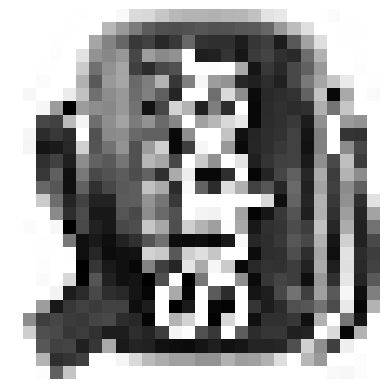

In [113]:
# Display 13th image (index 12)
plt.imshow(X_train[12], cmap="binary")
plt.axis('off')
plt.show()

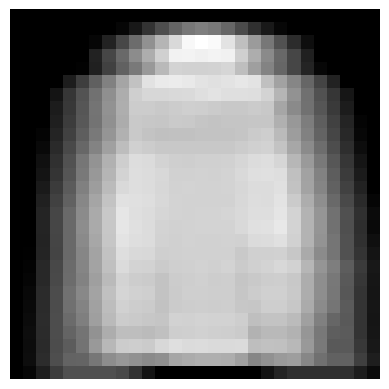

In [114]:
import numpy as np
from sklearn.datasets import load_sample_image

coat = X_train[0] # Extracting the first image from the training dataset and assigning it to 'coat'
bag = X_train[12] # Extracting the thirteenth image from the training dataset and assigning it to 'bag'

# Normalize the pixel values
coat = coat / 225 
bag = bag / 255

# Add an extra dimension for channels if the image is grayscale (2D) so it increases the dimentionality of the data
images = [coat, bag]

for idx, img in enumerate(images):
    if len(img.shape) == 2:
        images[idx] = np.expand_dims(img, axis=-1)

coat, bag = images
    
# Creating a NumPy array 'images' by stacking the individual arrays 'coat' and 'bag'.
images = np.array([coat, bag])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

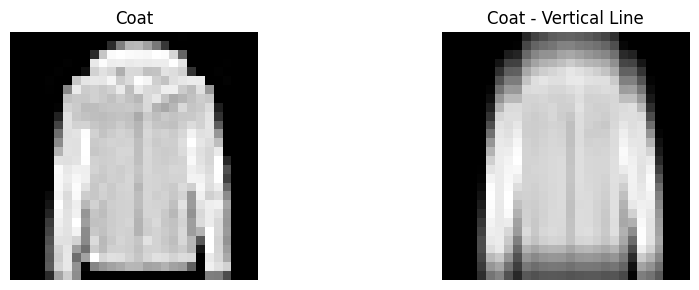

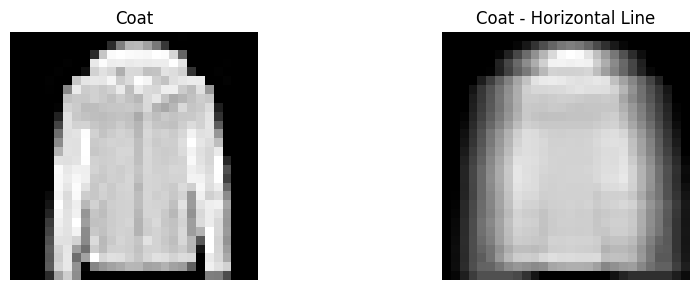

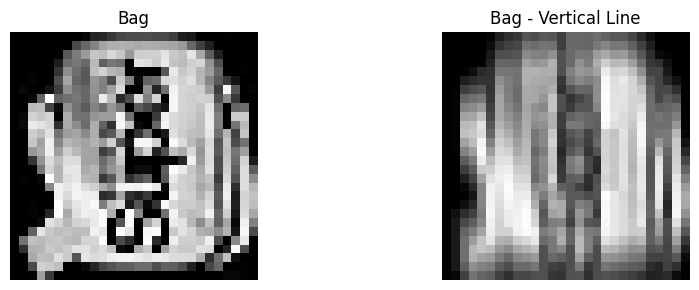

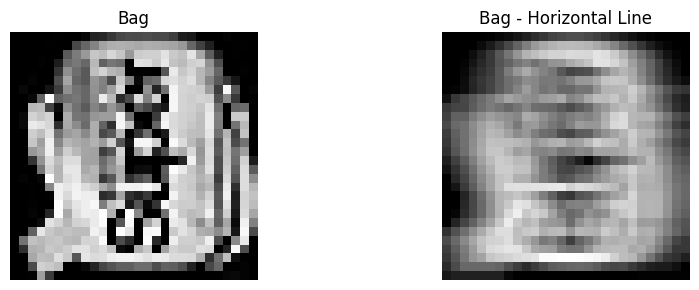

In [115]:
# Display images with filters (Vertical line and Horizonal line)
for image_index, image_name in enumerate(["Coat", "Bag"]):
    
    for feature_map_index, feature_description in enumerate(["Vertical Line", "Horizontal Line"]):
        fig, axarr = plt.subplots(1, 2, figsize=(10, 3))
        

        # Display the original image on the left
        axarr[0].imshow(images[image_index], cmap="gray", interpolation="nearest")
        axarr[0].axis("off")
        axarr[0].set_title(f"{image_name}")
        
        # Display the feature map on the right
        axarr[1].imshow(outputs[image_index, :, :, feature_map_index], cmap="gray", interpolation="nearest")
        axarr[1].axis("off")
        axarr[1].set_title(f"{image_name} - {feature_description}")

        # Display the pair of images side by side for each feature map
        plt.tight_layout()
        plt.show() 
        

In [116]:
# define function to display an image in color
def plot_color_image(img):
    plt.imshow(img, interpolation="nearest")
    plt.axis("off")

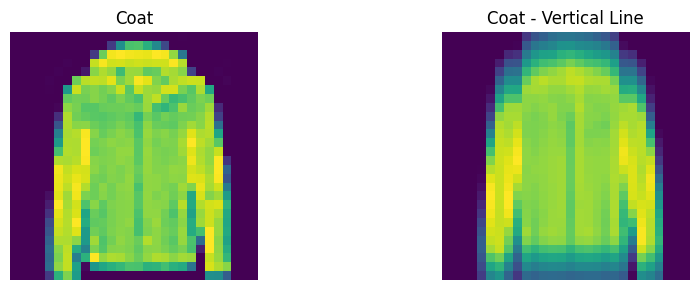

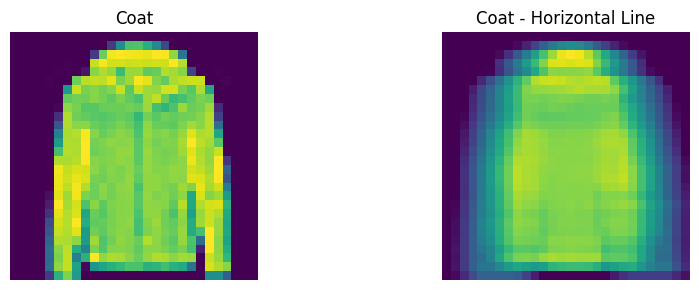

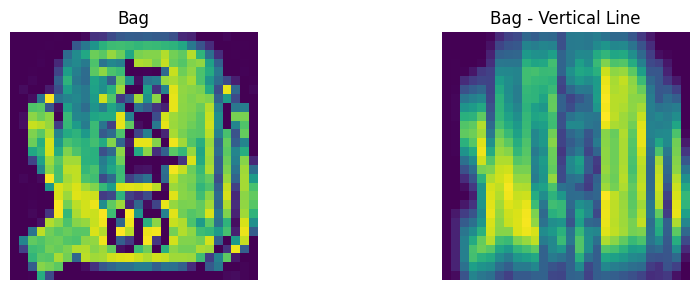

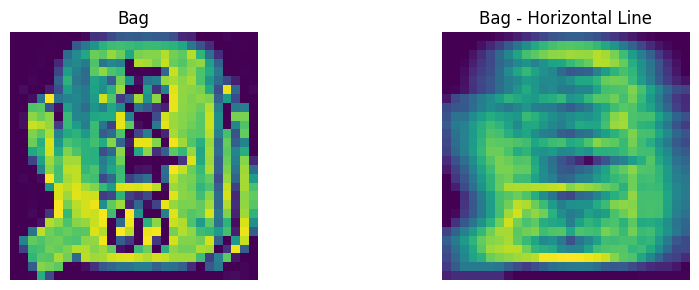

In [117]:
for image_index, image_name in enumerate(["Coat", "Bag"]):
    for feature_map_index, feature_description in enumerate(["Vertical Line", "Horizontal Line"]):
        fig, axarr = plt.subplots(1, 2, figsize=(10, 3))

        # Display the original image on the left
        plt.sca(axarr[0])  # set the current axis to axarr[0]
        plot_color_image(images[image_index]) 
        axarr[0].set_title(f"{image_name}")

        # Display the feature map on the right
        plt.sca(axarr[1])  # set the current axis to axarr[1]
        plot_color_image(outputs[image_index, :, :, feature_map_index])
        axarr[1].set_title(f"{image_name} - {feature_description}")
        
        # Display the pair of images side by side for each feature map
        plt.tight_layout()
        plt.show()  

## Train model1 using convolution layers and Max Pooling

In [118]:
X_train.shape # Get dimension of the data on the training set

(55000, 28, 28)

In [119]:
X_valid.shape # Get dimension of the data on the validation set

(5000, 28, 28)

In [120]:
X_test.shape # Get dimension of the data on the test set

(10000, 28, 28)

In [121]:
# Set default convolution for 2 dimension
from functools import partial

# Set paraneter for convolution layer
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', strides=1, padding="SAME") 

In [122]:
# Set up the model using convolutional layers and Max Pooling
model1 = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2), # Divide the size of the window by 2
    DefaultConv2D(filters=128), # Convolutional layer with 128 filters.
    DefaultConv2D(filters=128), # Convolutional layer with 128 filters.
    keras.layers.MaxPooling2D(pool_size=2), # Divide the size of the window by 2
    DefaultConv2D(filters=256), # Convolutional layer with 256 filters.
    DefaultConv2D(filters=256), # Convolutional layer with 256 filters.
    keras.layers.MaxPooling2D(pool_size=2), # Divide the size of the window by 2
    keras.layers.Flatten(), # Flattern layer to 1D array
    keras.layers.Dense(units=128, activation='relu'), # Fully connected (dense) hidden layer with 128 neurons and ReLU activation function
    keras.layers.Dropout(0.5), # Randomly sets 50% of the input units to 0
    keras.layers.Dense(units=64, activation='relu'), # Fully connected (dense) hidden layer with 64 neurons and ReLU activation function
    keras.layers.Dropout(0.5), # Randomly sets 50% of the input units to 0
    keras.layers.Dense(units=10, activation='softmax'), # Output layer with 10 neurons using Softmax activation
])

In [123]:
model1.summary() # Get summary of the layers

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 7, 7, 256)        

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

# Regularize validation set and stop once the model creases to improve.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Monitoring the "accuracy" metric during training.
model1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# Train on training set and evaluate validation set on each epoch
history1 = model1.fit(X_train, y_train, epochs=30, validation_data=[X_valid, y_valid], callbacks=[early_stopping]) 
# Evaluate Test set
score1 = model1.evaluate(X_test, y_test)

Epoch 1/30
1719/1719 [==============================] - 135s 77ms/step - loss: 0.7063 - accuracy: 0.7481 - val_loss: 0.3202 - val_accuracy: 0.8790
Epoch 2/30
1719/1719 [==============================] - 137s 80ms/step - loss: 0.4118 - accuracy: 0.8594 - val_loss: 0.2985 - val_accuracy: 0.8916
Epoch 3/30
1719/1719 [==============================] - 153s 89ms/step - loss: 0.3511 - accuracy: 0.8808 - val_loss: 0.2984 - val_accuracy: 0.8930
Epoch 4/30
1719/1719 [==============================] - 153s 89ms/step - loss: 0.3175 - accuracy: 0.8922 - val_loss: 0.2677 - val_accuracy: 0.9066
Epoch 5/30
1719/1719 [==============================] - 158s 92ms/step - loss: 0.2888 - accuracy: 0.8999 - val_loss: 0.2522 - val_accuracy: 0.9100
Epoch 6/30
1719/1719 [==============================] - 157s 92ms/step - loss: 0.2708 - accuracy: 0.9070 - val_loss: 0.2509 - val_accuracy: 0.9110
Epoch 7/30
1719/1719 [==============================] - 152s 88ms/step - loss: 0.2494 - accuracy: 0.9150 - val_loss: 0

In [ ]:
score1 # Get score of loss and accuracy from Test set

In [ ]:
history1.params # Display parameters related tot he traaining process

In [ ]:
print(history1.epoch) # Display number of epoch it ran

In [ ]:
history1.history.keys() # print names of metrics

In [ ]:
# Display the results of accuracy and loss from the validation set in graph plot
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot_with_convolution_layers")
plt.show()

In [ ]:
X_new1 = X_test[:10] # Assign new 10 images
y_prob1 = model1.predict(X_new1) # predict from the new 10 images
y_prob1.round(4)

## Train model2 without using convolution layers and Max Pooling

In [ ]:
# Set up the model without convolutional layer, Max Pooling, and Dropout so it can be used to compared with the previous model
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # Flatten layer to 1D with the dimension of 28 by 28
    keras.layers.Dense(300, activation="relu"), # Input layer with  300 neurons using ReLU activation
    keras.layers.Dense(200, activation="relu"), # Input layer with 200 neurons using ReLU activation
    keras.layers.Dense(100, activation="relu"), # Input layer with 100 neurons using ReLU activation
    keras.layers.Dense(50, activation="relu"), # Input layer with 50 neurons using Relu activation
    keras.layers.Dense(25, activation="relu"), # Input layer with 25 neurons using Relu activation
    keras.layers.Dense(10, activation="softmax") # Output layer with 10 neurons using Softmax activation
])

In [ ]:
# Complie the model using Adam as optimizer
model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=[X_valid, y_valid], callbacks=[early_stopping])
score2 = model2.evaluate(X_test, y_test)
X_new2 = X_test[:10] # Get 10 examples from Test set
y_prob2 = model2.predict(X_new2)
y_prob2.round(4)

In [ ]:
score2 # Get score for loss and accuracy from Test set

In [ ]:
history2.params # Display parameters related to the training process

In [ ]:
print(history2.epoch) # Display number of epoch it ran

In [ ]:
history2.history.keys() # print names of metrics

In [ ]:
# Display the results of accuracy and loss from the validation set in graph plot
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot_without_convolution_layers")
plt.show()

### Summary

#### The result from the model1, using convolutional layers, strides, and max pooling (referred to as "M1") shows that following

Evaluated on Test set

Number of Epoch: 12

Loss Estimation: 0.2680

Accuracy Estimation: 0.9109


#### The result from the model2, not using convolutional layers and max pooling (referred to as "M2") shows the following

Evaluted on Test set

Number of Epoch: 12

loss Estimation: 0.3382

Accuracy Estimation: 0.8795

##### As the result shown above, the model M1 performs better than the model M2 on image recognition classification